In [ ]:
!nvidia-smi

Sun Jul 30 09:47:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    45W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import os

In [ ]:
ROOT = "/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp-2.0/Regression-using-ANN"
os.chdir(ROOT)

In [ ]:
!pwd

/content/drive/MyDrive/005_BOKTIAR_AHMED_BAPPY/My_classes/FSDS-Bootcamp-2.0/Regression-using-ANN


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
X = pd.DataFrame(housing.data, columns= housing.feature_names)

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y = pd.DataFrame(housing.target, columns=['target'])

In [ ]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
X.shape

(20640, 8)

In [ ]:
y.shape

(20640, 1)

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, random_state=42)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [ ]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
LAYERS = [
         tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
         tf.keras.layers.Dense(10, activation="relu"),
         tf.keras.layers.Dense(5, activation='relu'),
         tf.keras.layers.Dense(1)

]

In [ ]:
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
# # For calculating accuracy score (r2 score)
# from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[coeff_determination])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
EPOCHS = 10

history = model.fit( X_train, y_train, epochs= EPOCHS, validation_data=(X_valid, y_valid))


Epoch 1/10
363/363 [==============================] - 7s 4ms/step - loss: 0.7569 - coeff_determination: 0.4164 - val_loss: 0.6785 - val_coeff_determination: 0.4018
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4398 - coeff_determination: 0.6478 - val_loss: 0.3769 - val_coeff_determination: 0.6873
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3955 - coeff_determination: 0.6855 - val_loss: 1.0732 - val_coeff_determination: -0.0084
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3816 - coeff_determination: 0.6936 - val_loss: 0.3808 - val_coeff_determination: 0.6803
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3633 - coeff_determination: 0.7071 - val_loss: 0.3548 - val_coeff_determination: 0.7017
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3546 - coeff_determination: 0.7162 - val_loss: 0.3503 - val_coeff_determination: 0.7063
Epoch 7/10
363/

In [ ]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,0.756948,0.416434,0.678549,0.401828
1,0.439752,0.647774,0.376882,0.687264
2,0.395538,0.685500,1.073177,-0.008358
3,0.381550,0.693558,0.380833,0.680275
4,0.363341,0.707062,0.354818,0.701732
5,0.354562,0.716205,0.350296,0.706339
6,0.347773,0.723127,0.337116,0.718714
7,0.345242,0.722383,0.335233,0.720672
8,0.343666,0.725665,0.329448,0.727694
9,0.340750,0.727514,0.342642,0.712892


<Axes: >

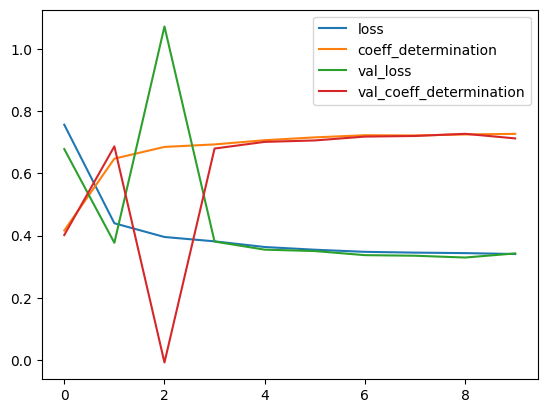

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3479 - coeff_determination: 0.7130


[0.34789350628852844, 0.7129831910133362]

In [ ]:
new = X_test[0]
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [ ]:
new.shape

(8,)

In [ ]:
new  = new.reshape((1,8))

In [ ]:
new.shape

(1, 8)

In [ ]:
model.predict(new)

1/1 [==============================] - 0s 83ms/step


array([[0.84091187]], dtype=float32)

In [ ]:
y_test

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
5363,5.00001
19755,0.63200
4885,1.17700
13043,2.63100
